'위키독스 딥 러닝을 이용한 자연어 처리 입문의 BiLSTM + CRF + 글자 임베딩의 튜토리얼 자료.'

링크 : https://wikidocs.net/147219  
링크 : https://wikidocs.net/147234  
링크 : https://wikidocs.net/147299

In [ ]:
pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 3.8 MB 44.3 MB/s 
     |████████████████████████████████| 462 kB 65.9 MB/s 
     |████████████████████████████████| 2.9 MB 49.8 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68713 sha256=e93e20ba4bb81f26ff6a3ad22c3d43610b0b1176854bd2ba9117f3a2a098ae54
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.0'

# CRF layer 설치

In [ ]:
pip install keras-crf==0.3.0

In [ ]:
# 모델 평가
!pip install seqeval

     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=5994f473d9219b458b78b0a14ed459c82d15dbe2cb4b8395286a239ba0cff94e
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
pip list | grep keras-crf

keras-crf                     0.3.0


# 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
!unzip ner_dataset.csv

Archive:  ner_dataset.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ner_dataset.csv or
        ner_dataset.csv.zip, and cannot find ner_dataset.csv.ZIP, period.


In [ ]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [ ]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
print('데이터프레임 행의 개수 : {}'.format(len(data)))

데이터프레임 행의 개수 : 1048575


In [ ]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))


데이터에 Null 값이 있는지 유무 : True


In [ ]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [ ]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [ ]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [ ]:
data = data.fillna(method="ffill")

In [ ]:
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [ ]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [ ]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 31817


In [ ]:
print(data[:5])

    Sentence #           Word  POS Tag
0  Sentence: 1      thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O


In [ ]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 개수: {}".format(len(tagged_sentences)))

전체 샘플 개수: 47959


In [ ]:
print(tagged_sentences[0]) # 첫번째 샘플 출력

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [ ]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 47,959개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [ ]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [ ]:
print(sentences[98])
print(ner_tags[98])

['she', 'had', 'once', 'received', 'a', 'kidney', 'transplant', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


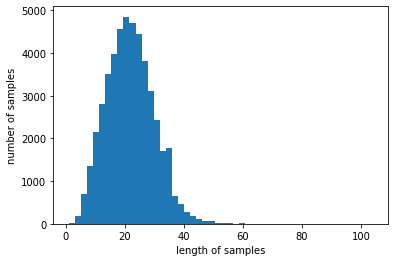

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [ ]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [ ]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [ ]:
print(X_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [ ]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [ ]:
print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [ ]:
decoded = []
for index in X_data[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [ ]:
max_len = 70
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [ ]:
print(X_data.shape)
print(y_data.shape)

(47959, 70)
(47959, 70)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.3, random_state=777)

In [ ]:
y_train_int = y_train
y_test_int = y_test
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (33571, 70)
훈련 샘플 레이블의 크기 : (33571, 70, 18)
테스트 샘플 문장의 크기 : (14388, 70)
테스트 샘플 레이블의 크기 : (14388, 70, 18)


# char 정보를 사용하기 위한 추가 전처리

In [ ]:
# char_vocab 만들기
words = list(set(data["Word"].values))
chars = set([w_i for w in words for w_i in w])
print(chars)

{'d', 'l', 's', 'a', 'w', 'h', 'f', '8', '4', '\x92', '\xa0', '-', 'o', ')', '&', ';', 'e', '"', '\x94', '0', '9', 'ë', '@', '~', '?', "'", '\x93', '+', '!', 'c', '1', '\x91', 'x', 'm', 'v', '\x97', 'j', 'q', '(', '$', 'ö', '/', 'z', '\x96', 't', 'y', 'u', 'k', '\x85', '_', '5', 'n', '7', 'g', ',', '3', 'r', '6', ':', 'p', 'ü', '°', '`', 'b', 'é', '2', ']', '.', '#', 'i', '[', '%'}


In [ ]:
char_to_index = {c: i + 2 for i, c in enumerate(chars)}
char_to_index["OOV"] = 1
char_to_index["PAD"] = 0

In [ ]:
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [ ]:
print(sentences[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [ ]:
  max_len_char = 15

  def padding_char_indice(char_indice, max_len_char):
      return pad_sequences(
        char_indice, maxlen=max_len_char, padding='post', 
        value = 0)
    
  def integer_coding(sentences):
      char_data = []
      for ts in sentences:
        word_indice = [word_to_index[t] for t in ts]
        char_indice = [[char_to_index[char] for char in t]  
                                                     for t in ts]
        char_indice = padding_char_indice(char_indice, max_len_char)
    
        for chars_of_token in char_indice:
            if len(chars_of_token) > max_len_char:
                print("최대 단어 길이 초과!")
                continue
        char_data.append(char_indice)
      return char_data

In [ ]:
X_char_data = integer_coding(sentences)

In [ ]:
print(X_data[0])

[ 254    6  967   16 1795  238  468    7  523    2  129    5   61    9
  571    2  833    6  186   90   22   15   56    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
print(X_char_data[0])

[[46  7 14 48  4  5 53  2  4  0  0  0  0  0  0]
 [14  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 18 35 14 53  4 46 58  5 46 14 58  4  0  0]
 [ 7  5 36 18  0  0  0  0  0  0  0  0  0  0  0]
 [35  5 58 31  7 18  2  0  0  0  0  0  0  0  0]
 [46  7 58 14 48 55  7  0  0  0  0  0  0  0  0]
 [ 3 14 53  2 14 53  0  0  0  0  0  0  0  0  0]
 [46 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [61 58 14 46 18  4 46  0  0  0  0  0  0  0  0]
 [46  7 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  5 58  0  0  0  0  0  0  0  0  0  0  0  0]
 [71 53  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [71 58  5 39  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 53  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 18 35  5 53  2  0  0  0  0  0  0  0  0  0]
 [46  7 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6 71 46  7  2 58  5  6  5  3  0  0  0  0  0]
 [14  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [65 58 71 46 71  4  7  0  0  0  0  0  0  0  0]
 [46 58 14 14 61  4  0  0  0  0  0  0  0  0  0]
 [ 8 58 14 35  0  0  0  0  0  0  0  0  0

In [ ]:
X_char_data = pad_sequences(X_char_data, maxlen=max_len, padding='post', value = 0)

In [ ]:
X_char_train, X_char_test, _, _ = train_test_split(X_char_data, y_data, test_size=.3, random_state=777)

In [ ]:
X_char_train = np.array(X_char_train)
X_char_test = np.array(X_char_test)

In [ ]:
print(X_train[0])

[   2 9026 1960    5 2891   22  128 2965 8906    7  426  134 8906    3
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


위 문장에서 첫번째 단어는 정수 2입니다.

In [ ]:
print(index_to_word[2])

the


In [ ]:
print(X_char_train[0])

[[46  7 18 ...  0  0  0]
 [ 4 61 71 ...  0  0  0]
 [58  5 53 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
print(X_char_train[0][0])

[46  7 18  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
print(' '.join([index_to_char[index] for index in X_char_train[0][0]]))

t h e PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD


In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('훈련 샘플 char 데이터의 크기 : {}'.format(X_char_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (33571, 70)
훈련 샘플 레이블의 크기 : (33571, 70, 18)
훈련 샘플 char 데이터의 크기 : (33571, 70, 15)
테스트 샘플 문장의 크기 : (14388, 70)
테스트 샘플 레이블의 크기 : (14388, 70, 18)


# BiLSTM을 이용한 개체명 인식

## 모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dense(tag_size, activation=('softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         4072832   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 512)         788480    
_________________________________________________________________
dense_2 (Dense)              (None, None, 18)          9234      
Total params: 4,870,546
Trainable params: 4,870,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, validation_split=0.1)

Epoch 1/6
237/237 [==============================] - 13s 30ms/step - loss: 0.1849 - accuracy: 0.8707 - val_loss: 0.0829 - val_accuracy: 0.9283
Epoch 2/6
237/237 [==============================] - 4s 19ms/step - loss: 0.0566 - accuracy: 0.9485 - val_loss: 0.0518 - val_accuracy: 0.9506
Epoch 3/6
237/237 [==============================] - 4s 19ms/step - loss: 0.0374 - accuracy: 0.9643 - val_loss: 0.0444 - val_accuracy: 0.9571
Epoch 4/6
237/237 [==============================] - 4s 19ms/step - loss: 0.0300 - accuracy: 0.9707 - val_loss: 0.0456 - val_accuracy: 0.9544
Epoch 5/6
237/237 [==============================] - 5s 19ms/step - loss: 0.0260 - accuracy: 0.9740 - val_loss: 0.0439 - val_accuracy: 0.9582
Epoch 6/6
237/237 [==============================] - 5s 19ms/step - loss: 0.0223 - accuracy: 0.9774 - val_loss: 0.0454 - val_accuracy: 0.9591


In [ ]:
model.save('bilstm.h5')

In [ ]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


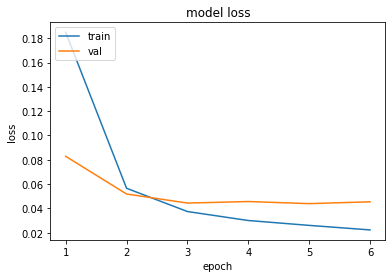

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def sequences_to_tag(sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

In [ ]:
y_predicted = model.predict([X_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

         art       0.40      0.02      0.04        99
         eve       0.42      0.23      0.30        82
         geo       0.82      0.85      0.83     11349
         gpe       0.96      0.94      0.95      4690
         nat       0.54      0.23      0.32        61
         org       0.60      0.53      0.57      6023
         per       0.71      0.71      0.71      5242
         tim       0.87      0.82      0.84      6148

   micro avg       0.79      0.77      0.78     33694
   macro avg       0.67      0.54      0.57     33694
weighted avg       0.79      0.77      0.78     33694



## 성능

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 78.3%


# BiLSTM-CNN을 이용한 개체명인식

## 모델링

In [ ]:
from tensorflow.keras.layers import Embedding, TimeDistributed, Dropout, concatenate, Bidirectional, LSTM, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import Input, Model
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# 단어 임베딩
words_input = Input(shape=(None,),dtype='int32',name='words_input')
words = Embedding(input_dim = vocab_size, output_dim = 128)(words_input)

# char 임베딩
character_input = Input(shape=(None, max_len_char,),name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), 64, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(character_input)
dropout = Dropout(0.5)(embed_char_out)

# char 임베딩에 대해서는 Conv1D 수행
conv1d_out= TimeDistributed(Conv1D(kernel_size=3, filters=30, padding='same', activation='tanh', strides=1))(dropout)
maxpool_out=TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char = TimeDistributed(Flatten())(maxpool_out)
char = Dropout(0.5)(char)

# char 임베딩을 Conv1D 수행한 뒤에 단어 임베딩과 연결
output = concatenate([words, char])

# 연결한 벡터를 가지고 문장의 길이만큼 LSTM을 수행
output = Bidirectional(LSTM(256, return_sequences=True, dropout=0.5))(output)

# 출력층
output = TimeDistributed(Dense(tag_size, activation='softmax'))(output)

model = Model(inputs=[words_input, character_input], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='nadam',  metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, None, 15)]   0                                            
__________________________________________________________________________________________________
char_embedding (TimeDistributed (None, None, 15, 64) 4736        char_input[0][0]                 
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, None, 15, 64) 0           char_embedding[0][0]             
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, None, 15, 30) 5790        dropout_2[0][0]                  
____________________________________________________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = model.fit([X_train, X_char_train], y_train, batch_size = 128, epochs = 15, validation_split = 0.1, verbose = 1, callbacks=[es, mc])

Epoch 1/15
237/237 [==============================] - 15s 48ms/step - loss: 0.2242 - acc: 0.9436 - val_loss: 0.1112 - val_acc: 0.9686

Epoch 00001: val_acc improved from -inf to 0.96857, saving model to bilstm_cnn.h5
Epoch 2/15
237/237 [==============================] - 11s 45ms/step - loss: 0.0714 - acc: 0.9799 - val_loss: 0.0815 - val_acc: 0.9753

Epoch 00002: val_acc improved from 0.96857 to 0.97533, saving model to bilstm_cnn.h5
Epoch 3/15
237/237 [==============================] - 11s 46ms/step - loss: 0.0488 - acc: 0.9858 - val_loss: 0.0544 - val_acc: 0.9837

Epoch 00003: val_acc improved from 0.97533 to 0.98368, saving model to bilstm_cnn.h5
Epoch 4/15
237/237 [==============================] - 11s 45ms/step - loss: 0.0406 - acc: 0.9880 - val_loss: 0.0491 - val_acc: 0.9848

Epoch 00004: val_acc improved from 0.98368 to 0.98481, saving model to bilstm_cnn.h5
Epoch 5/15
237/237 [==============================] - 11s 45ms/step - loss: 0.0354 - acc: 0.9894 - val_loss: 0.0467 - val_a

In [ ]:
model = load_model('bilstm_cnn.h5')

In [ ]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])]) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴

y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


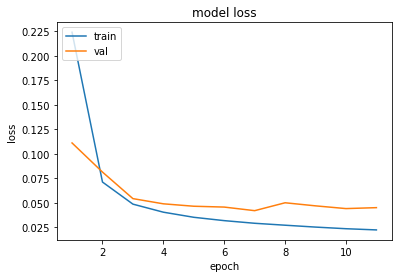

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def sequences_to_tag(sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

In [ ]:
y_predicted = model.predict([X_test, X_char_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

         art       0.14      0.03      0.05        99
         eve       0.55      0.26      0.35        82
         geo       0.83      0.85      0.84     11349
         gpe       0.96      0.94      0.95      4690
         nat       0.83      0.16      0.27        61
         org       0.64      0.52      0.57      6023
         per       0.73      0.70      0.72      5242
         tim       0.85      0.84      0.85      6148

   micro avg       0.81      0.78      0.79     33694
   macro avg       0.69      0.54      0.57     33694
weighted avg       0.80      0.78      0.79     33694



## 성능

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 79.1%


# BiLSTM-CRF를 이용한 개체명인식

## 모델링

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel

In [ ]:
sequence_input = Input(shape=(max_len,),dtype=tf.int32, name='sequence_input')

model_embedding = Embedding(input_dim=vocab_size,
                                            output_dim=128,
                                            input_length=max_len)(sequence_input)

# model_bilstm = Bidirectional(LSTM(units=64, return_sequences=True, recurrent_dropout=0.1))(model_embedding)
model_bilstm = Bidirectional(LSTM(units=64, return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(0.3))(model_bilstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = tf.keras.Model(inputs=sequence_input, outputs=model_dense)

model = CRFModel(base, tag_size)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              metrics='accuracy')

model.summary()

Model: "crf_model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence_input (InputLayer)     [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 70, 128)      4072832     sequence_input[0][0]             
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 70, 128)      98816       embedding_3[0][0]                
__________________________________________________________________________________________________
time_distributed_6 (TimeDistrib (None, 70, 128)      0           bidirectional_3[0][0]            
________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# es = EarlyStopping(monitor='val_decode_sequence_accuracy', mode='max', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
history = model.fit(X_train, y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


237/237 [==============================] - 32s 115ms/step - decode_sequence_accuracy: 0.8318 - loss: 27.5034 - val_decode_sequence_accuracy: 0.9541 - val_loss: 9.3429

Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.95408, saving model to bilstm_crf/cp.ckpt
Epoch 2/15
237/237 [==============================] - 26s 108ms/step - decode_sequence_accuracy: 0.9637 - loss: 7.4308 - val_decode_sequence_accuracy: 0.9767 - val_loss: 4.9900

Epoch 00002: val_decode_sequence_accuracy improved from 0.95408 to 0.97674, saving model to bilstm_crf/cp.ckpt
Epoch 3/15
237/237 [==============================] - 26s 109ms/step - decode_sequence_accuracy: 0.9783 - loss: 4.5754 - val_decode_sequence_accuracy: 0.9824 - val_loss: 3.4663

Epoch 00003: val_decode_sequence_accuracy improved from 0.97674 to 0.98242, saving model to bilstm_crf/cp.ckpt
Epoch 4/15
237/237 [==============================] - 26s 108ms/step - decode_sequence_accuracy: 0.9844 - loss: 3.1227 - val_decode_sequence_accur

In [ ]:
model.load_weights('bilstm_crf/cp.ckpt')

In [ ]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]]))[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
# y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [ ]:
y_predicted = model.predict(X_test)[0]

In [ ]:
def sequences_to_tag(sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

In [ ]:
def sequences_to_tag_for_crf(sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            # pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            pred_index = pred
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

In [ ]:
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

         art       0.33      0.01      0.02        99
         eve       0.69      0.11      0.19        82
         geo       0.82      0.84      0.83     11349
         gpe       0.95      0.94      0.95      4690
         nat       1.00      0.03      0.06        61
         org       0.66      0.55      0.60      6023
         per       0.73      0.71      0.72      5242
         tim       0.86      0.83      0.84      6148

   micro avg       0.81      0.77      0.79     33694
   macro avg       0.76      0.50      0.53     33694
weighted avg       0.80      0.77      0.78     33694



## 성능

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 79.0%


#BiLSTM-CNN-CRF를 이용한 개체명인식

## 모델링

In [ ]:
from keras_crf import CRFModel

In [ ]:
# 단어 임베딩
words_input = Input(shape=(None,),dtype='int32',name='words_input')
words = Embedding(input_dim = vocab_size, output_dim = 128)(words_input)

# char 임베딩
character_input = Input(shape=(None, max_len_char,),name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), 64, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(character_input)
dropout = Dropout(0.5)(embed_char_out)

# char 임베딩에 대해서는 Conv1D 수행
conv1d_out= TimeDistributed(Conv1D(kernel_size=3, filters=30, padding='same',activation='tanh', strides=1))(dropout)
maxpool_out=TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char = TimeDistributed(Flatten())(maxpool_out)
char = Dropout(0.5)(char)

# char 임베딩을 Conv1D 수행한 뒤에 단어 임베딩과 연결
output = concatenate([words, char])

# 연결한 벡터를 가지고 문장의 길이만큼 LSTM을 수행
output = Bidirectional(LSTM(256, return_sequences=True, dropout=0.50))(output)

# 출력층
output = TimeDistributed(Dense(tag_size, activation='relu'))(output)

base = Model(inputs=[words_input, character_input], outputs=[output])

model = CRFModel(base, tag_size)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              metrics='accuracy')

model.summary()

Model: "crf_model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, None, 15)]   0                                            
__________________________________________________________________________________________________
char_embedding (TimeDistributed (None, None, 15, 64) 4736        char_input[0][0]                 
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, None, 15, 64) 0           char_embedding[0][0]             
__________________________________________________________________________________________________
time_distributed_22 (TimeDistri (None, None, 15, 30) 5790        dropout_11[0][0]                 
________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_cnn_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
history = model.fit([X_train, X_char_train], y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


237/237 [==============================] - 37s 136ms/step - decode_sequence_accuracy: 0.8830 - loss: 19.6926 - val_decode_sequence_accuracy: 0.9665 - val_loss: 6.7591

Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.96649, saving model to bilstm_cnn_crf/cp.ckpt
Epoch 2/15
237/237 [==============================] - 31s 132ms/step - decode_sequence_accuracy: 0.9723 - loss: 5.6284 - val_decode_sequence_accuracy: 0.9809 - val_loss: 3.3146

Epoch 00002: val_decode_sequence_accuracy improved from 0.96649 to 0.98085, saving model to bilstm_cnn_crf/cp.ckpt
Epoch 3/15
237/237 [==============================] - 31s 132ms/step - decode_sequence_accuracy: 0.9838 - loss: 3.4431 - val_decode_sequence_accuracy: 0.9840 - val_loss: 2.4619

Epoch 00003: val_decode_sequence_accuracy improved from 0.98085 to 0.98397, saving model to bilstm_cnn_crf/cp.ckpt
Epoch 4/15
237/237 [==============================] - 31s 131ms/step - decode_sequence_accuracy: 0.9869 - loss: 2.5983 - val_decode_se

In [ ]:
model.load_weights('bilstm_cnn_crf/cp.ckpt')

In [ ]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
# y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


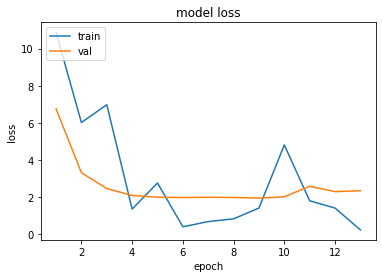

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict([X_test, X_char_test])[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

         art       0.38      0.03      0.06        99
         eve       0.89      0.20      0.32        82
         geo       0.82      0.86      0.84     11349
         gpe       0.95      0.94      0.94      4690
         nat       0.62      0.08      0.14        61
         org       0.71      0.52      0.60      6023
         per       0.76      0.69      0.73      5242
         tim       0.85      0.85      0.85      6148

   micro avg       0.82      0.78      0.80     33694
   macro avg       0.75      0.52      0.56     33694
weighted avg       0.81      0.78      0.79     33694



## 성능

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 79.8%


# BiLSTM-BiLSTM-CRF을 이용한 개체명 인식

## 모델링

In [ ]:
word_ids = Input(batch_shape=(None, None), dtype='int32', name='word_input')
word_embeddings = Embedding(input_dim=vocab_size,
                                        output_dim=128,
                                        name='word_embedding')(word_ids)

char_ids = Input(batch_shape=(None, None, None), dtype='int32', name='char_input')
char_embeddings = Embedding(input_dim=(len(char_to_index)),
                                        output_dim=64,
                                        embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5),
                                        name='char_embedding')(char_ids)

char_embeddings = TimeDistributed(Bidirectional(LSTM(64)))(char_embeddings)
word_embeddings = concatenate([word_embeddings, char_embeddings])

word_embeddings = Dropout(0.3)(word_embeddings)
output = Bidirectional(LSTM(units=64, return_sequences=True))(word_embeddings)
output = Dense(tag_size, activation='relu')(output)

base = Model(inputs=[word_ids, char_ids], outputs=[output])

model = CRFModel(base, tag_size)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              metrics='accuracy')

model.summary()

Model: "crf_model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, None, None)] 0                                            
__________________________________________________________________________________________________
word_input (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
char_embedding (Embedding)      (None, None, None, 6 4736        char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, None, 128)    4072832     word_input[0][0]                 
_______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
history = model.fit([X_train, X_char_train], y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


237/237 [==============================] - 39s 137ms/step - decode_sequence_accuracy: 0.8584 - loss: 19.9579 - val_decode_sequence_accuracy: 0.9656 - val_loss: 5.9294

Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.96562, saving model to bilstm_bilstm_crf/cp.ckpt
Epoch 2/15
237/237 [==============================] - 31s 130ms/step - decode_sequence_accuracy: 0.9718 - loss: 5.4393 - val_decode_sequence_accuracy: 0.9819 - val_loss: 2.9849

Epoch 00002: val_decode_sequence_accuracy improved from 0.96562 to 0.98188, saving model to bilstm_bilstm_crf/cp.ckpt
Epoch 3/15
237/237 [==============================] - 31s 130ms/step - decode_sequence_accuracy: 0.9847 - loss: 3.1488 - val_decode_sequence_accuracy: 0.9852 - val_loss: 2.1704

Epoch 00003: val_decode_sequence_accuracy improved from 0.98188 to 0.98518, saving model to bilstm_bilstm_crf/cp.ckpt
Epoch 4/15
237/237 [==============================] - 31s 131ms/step - decode_sequence_accuracy: 0.9875 - loss: 2.3728 - val_

In [ ]:
model.load_weights('bilstm_bilstm_crf/cp.ckpt')

In [ ]:
i=13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
# y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:390: UserWarning: CRF Decoding does not work with KerasTensors in TF2.4. The bug has since been fixed in tensorflow/tensorflow##45534
  return py_builtins.overload_of(f)(*args)


단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


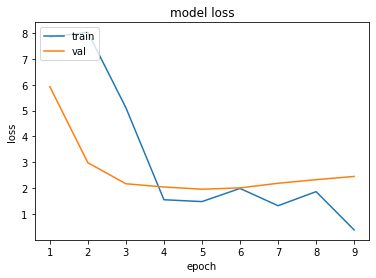

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict([X_test, X_char_test])[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_tags, pred_tags))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.00      0.00      0.00        99
         eve       0.89      0.20      0.32        82
         geo       0.84      0.85      0.84     11349
         gpe       0.95      0.94      0.94      4690
         nat       0.00      0.00      0.00        61
         org       0.65      0.58      0.61      6023
         per       0.76      0.74      0.75      5242
         tim       0.87      0.85      0.86      6148

   micro avg       0.82      0.79      0.80     33694
   macro avg       0.62      0.52      0.54     33694
weighted avg       0.81      0.79      0.80     33694



## 성능

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 80.3%
